In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
%matplotlib inline


Release time is:  1.2021631944444442  µs


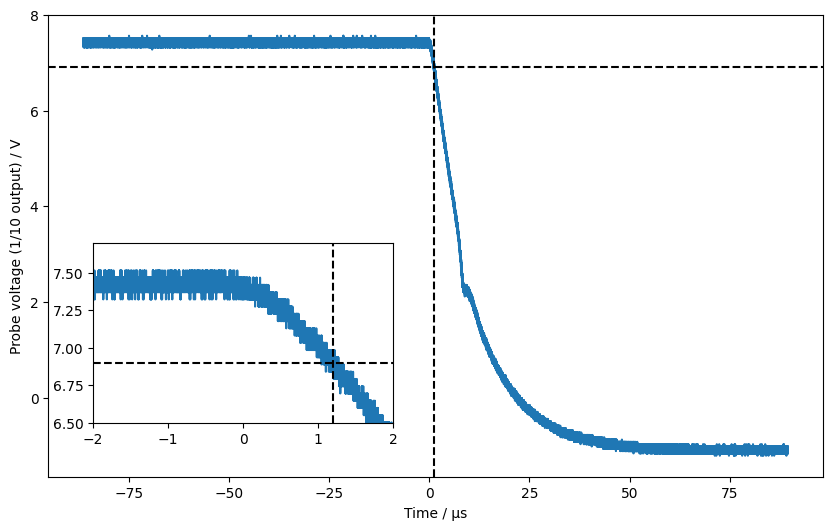

In [71]:
ScopeData1 = np.loadtxt(r'C:\Users\au581149\PhD-Work\Lab Stuff\ESI\Time of flight\ToF_04_03_2025 -- Lys and R6G\scope_1_2.csv',skiprows=2,delimiter=',')
fig,ax = plt.subplots(figsize = (10,6))
ScopeTime1 = ScopeData1[:,0]
ScopeVoltage1 = ScopeData1[:,1]
t0 = -1.563*1e-6
ax.plot((ScopeTime1-t0)*1e6,ScopeVoltage1)
minval = np.argmin(np.abs(ScopeVoltage1-6.9))
minima = (np.where(ScopeVoltage1 == ScopeVoltage1[minval]))
releaseTime = (np.mean(1e6*(ScopeTime1-t0)[minima]))
print('Release time is: ', releaseTime,' µs')
ax.set_xlabel('Time / µs')
ax.set_ylabel('Probe voltage (1/10 output) / V')
ax.axhline(6.9, ls = '--', color = 'k')
ax.axvline(releaseTime, ls = '--',color = 'k')

inset_ax = fig.add_axes([0.17, 0.2, 0.3, 0.3])  # [left, bottom, width, height]
inset_ax.plot((ScopeTime1-t0)*1e6,ScopeVoltage1)
inset_ax.set_xlim(-2,2)
inset_ax.set_ylim(6.5,7.7)
inset_ax.axhline(6.9, ls = '--', color = 'k')
inset_ax.axvline(releaseTime, ls = '--',color = 'k')

In [76]:
"""Now we plot the data for the R6G and Lys measurements:"""


DataLys = np.loadtxt(r'C:\Users\au581149\PhD-Work\Lab Stuff\ESI\Time of flight\ToF_04_03_2025 -- Lys and R6G\Lys_ToF_04_03_2025.txt',skiprows = 1, delimiter = ',')
DataR6G = np.loadtxt(r'C:\Users\au581149\PhD-Work\Lab Stuff\ESI\Time of flight\ToF_04_03_2025 -- Lys and R6G\R6G_ToF_04_03_2025.txt',skiprows = 1, delimiter = ',')

timesLys = DataLys[:,1]-DataLys[0,1]
countsLys = DataLys[:,0]

timesR6G = DataR6G[:,1]-DataR6G[0,1]
countsR6G = DataR6G[:,0]

In [ ]:
%matplotlib inline

In [ ]:
n_shots = 30/0.05
fig,ax = plt.subplots()
fig.suptitle(rf'$N = {n_shots}$ extractions')
ax.errorbar(timesLys*1e-3-releaseTime,countsLys/n_shots,yerr = np.sqrt(countsLys)/n_shots,fmt = 'o',label = 'Lys',markersize = 2, ls = '--')

ax.errorbar(timesR6G*1e-3-releaseTime,countsR6G/n_shots,yerr = np.sqrt(countsR6G)/n_shots,fmt = 'o',label = 'R6G',markersize = 2, ls = '--')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.set_xlabel('Time after release / µs')
ax.set_ylabel('Ions per extraction')

r6gpeak = 48.5
ax.axvline(r6gpeak, ls = '-', color = 'k')
ax.axvline(r6gpeak* np.sqrt(147/443), color = 'r')
ax.axvline(r6gpeak* np.sqrt(413/443), color = 'g')
ax.axvline(r6gpeak* np.sqrt(84/443), color = 'b')

unknownt1 = 33.58
unknownt2 = 37

unknownM1 = 443*(unknownt1/r6gpeak)**2
unknownM2 = 443*(unknownt2/r6gpeak)**2